###Criação de visual utilizando Python + *Plotly*

###Utilizando os dados do [Censo Escolar de 2021](https://download.inep.gov.br/dados_abertos/microdados_censo_escolar_2021.zip), disponibilizados pelo INEP, seguem as orientações gerais da atividade:

*   Realizar uma análise focada das entidades escolares com localização diferenciada
(área de assentamento, terra indígena e áreas remanescentes de quilombos) no
estado Rio Grande do Sul.
*   O objetivo principal da investigação é entender a distribuição entre a quantidade.
*   Foi solicitado para que os resultados sejam mostrados em dois gráficos separados
lado a lado considerando o tipo de localização da entidade (Urbana ou Rural).
*   As escolas que não estão situadas em áreas de localização diferenciada devem
ser removidas da análise.
*   O valor de quantidade de turmas também deve ser utilizado como uma dimensão
adicional para dar mais destaque às entidades que possuem mais turmas.









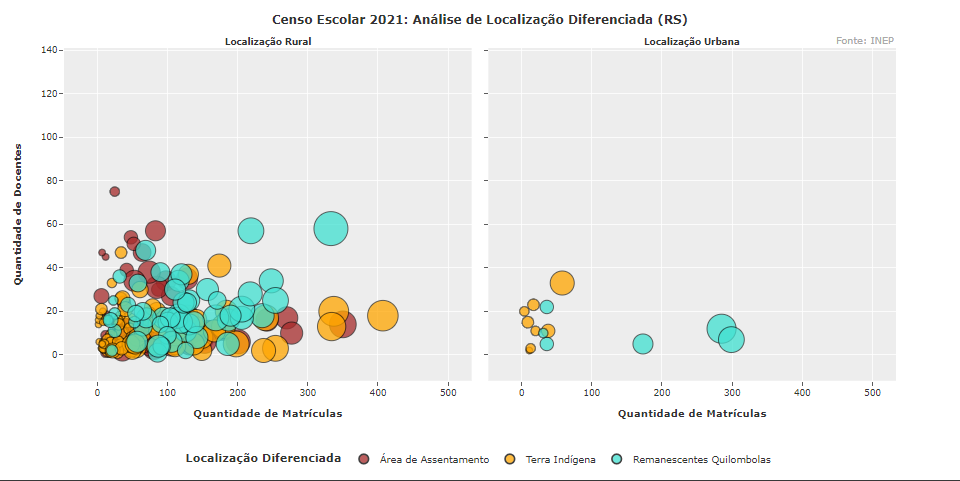

###Para realizar a atividade, será necessário seguir alguns padrões:


1.   Gerar os gráficos utilizando Python + Plotly (Google Colab).

2.   Baixar a base de dados do Censo escolar 2021, necessária para a realização da prática (esse material compactado já contém a base de dados em um arquivo
CSV e um dicionário de dados em um arquivo XLSX).

3. Os gráficos devem respeitar o template padrão “ggplot2”.

4. O título do gráfico deve ser: “Censo Escolar 2021: Análise de Localização
Diferenciada (RS)”, centralizado, todo em negrito com tamanho de fonte 14.

5. O gráfico deve ser gerado com 600 pixels de altura e 1200 pixels de largura.

6. A legenda deve ser utilizada na orientação horizontal, centralizado e na parte inferior do gráfico. Também deve apresentar o significado de cada dado,
conforme o dicionário de dados.

7. O título da legenda de ser alterado para: “Localização Diferenciada”, com
tamanho de fonte igual a 12.

8. Para escolas em área de assentamento, deve ser utilizada a cor “brown”.

9. Para escola em terra indígena, deve ser utilizada a cor “orange”.

10. Para escolas em áreas remanescentes de quilombo, deve ser utilizada a cor
“turquoise”.

11. Os títulos individuais dos subgráficos devem apresentar o significado de cada tipo de localização, conforme o dicionário de dados.

12. O eixo com a quantidade de matrículas deve ser fixado entre 0 e 500. Deve
também receber o título: “Quantidade de Matrículas”, com fonte tamanho 11.

13. O eixo com a quantidade de docentes deve ser fixado entre 0 e 200. Deve
também receber o título: “Quantidade de Matrículas”, com fonte tamanho 11.

14. Os marcadores devem ter borda da cor preta e opacidade de 75%.

15. Marcadores devem ter seu tamanho máximo igual a 30.

16. No canto superior direito da imagem, deve ser inserida uma anotação com o
texto “Fonte: INEP”, com a cor “dark_gray” e fonte tamanho 12. 

17. O visual deve ser exportado no formato HMTL com o nome:
“localizacao_diferenciada_rs.html”.





In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Lendo dados do DF
df_ed_basica = pd.read_csv('microdados_ed_basica_2021.csv', sep=';', 
                       encoding = "iso-8859-1")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Filtro por estado 
df_ed_basica_RS = df_ed_basica[df_ed_basica['SG_UF'] == 'RS']

In [4]:
# Filtro por entidades 
df_loc_diferenciada = df_ed_basica_RS[df_ed_basica_RS['TP_LOCALIZACAO_DIFERENCIADA'] != 0]

In [5]:
# Excluindo valores nulos
df_loc_diferenciada = df_loc_diferenciada.dropna(subset=['QT_TUR_BAS'])

In [6]:
# Alterando dados para "str"
df_loc_diferenciada['TP_LOCALIZACAO_DIFERENCIADA'] = df_loc_diferenciada['TP_LOCALIZACAO_DIFERENCIADA'].astype(str)

In [7]:
# Definindo legendas
cores = {'3.0':'turquoise' , '2.0': 'orange', '1.0':'brown'} 
ordem = {'TP_LOCALIZACAO_DIFERENCIADA' : ['1.0', '2.0', '3.0']}

####Plotando gráfico, padrão “ggplot2”.

In [8]:
fig = px.scatter(df_loc_diferenciada,
                  x='QT_MAT_BAS', 
                  y= 'QT_DOC_BAS', 
                  facet_col='TP_LOCALIZACAO', 
                  color = 'TP_LOCALIZACAO_DIFERENCIADA',
                  color_discrete_map = cores,
                  size = "QT_TUR_BAS",
                  size_max = 30,
                  category_orders = ordem,
                  opacity = 0.75
                  )

fig.update_layout(template='ggplot2')

fig.show()

####Definindo título do gráfico.

In [9]:
fig.update_layout(
    title = '<b>Censo Escolar 2021: Análise de Localização Diferenciada (RS)</b>',
    xaxis = dict(titlefont_size=14, tickfont_size=11),
    yaxis = dict(titlefont_size=14, tickfont_size=11)
)

##### Definindo tamanho do gráfico

In [10]:
fig.update_layout(height = 600, width = 1200)

##### Definindo local da legenda e significado conforme dicionário

In [11]:
fig.update_layout(
    legend=dict(
        orientation = 'h', 
        yanchor = 'top',
        y = -.2,
        xanchor = 'center',
        x = 0.5
    )
)
sig_entidades = {'1.0':'Área de Assentamento', '2.0': 'Terra Indígena', 
                 '3.0': 'Remanescentes Quilombolas'}

fig.for_each_trace(
    lambda e: e.update(
    name = sig_entidades[e.name],
    legendgroup = sig_entidades[e.name]
    )
)

####Definindo título da legenda.

In [12]:
fig.update_layout(
    legend=dict(
        title = '<b>Localização Diferenciada</b>',
        font_size = 12,
        itemsizing = 'constant'
    )
)

####Definindo títulos individuais dos subgráficos e fixando eixos.

In [13]:
fig.layout.annotations[1].text= '<b>Localização Urbana</b>'
fig.layout.annotations[0].text= '<b>Localização Rural</b>'

fig.update_layout(
    xaxis_title = '<b>Quantidade de Matrículas</b>',
    xaxis2_title = '<b>Quantidade de Matrículas</b>',
    yaxis_title = '<b>Quantidade de Docentes</b>',
    font_size = 11
)

fig.update_yaxes(range = [0,200]) 
fig.update_xaxes(range = [0,500])

####Formatando marcadores.

In [14]:
fig.update_traces(marker_line_width = 1, marker_line_color = 'black')

####Inserindo uma anotação com informação da fonte de dados.

In [15]:
fig.add_annotation(
    text="Fonte: INEP",
    xref="paper",
    yref="paper",
    font_color = "darkgray",
    font_size = 12,
    xanchor = 'right',
    yanchor = 'bottom',
    x=1,
    y=1,
    showarrow=False)

####Exportado no formato HMTL com o nome: “localizacao_diferenciada_rs.html”.

In [16]:
fig.write_html('localizacao_diferenciada_rs.html')